In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

## Generate Data

In [2]:
X_train = np.linspace(-1, 1, 20)

In [3]:
y_train = np.array([-0.6561, -0.3099, -0.59035, -0.50855, -0.285,  
                    -0.2443, -0.02445, 0.00135, -0.2006, 0.07475,  
                    -0.1422, 0.06515, 0.15265, 0.3521, 0.28415,  
                    0.5524, 0.23115, 0.20835, 0.4211, 0.60485])


In [4]:
X_test = np.linspace(-1, 1, 20)

In [5]:
y_test = np.array([-0.69415, -0.451, -0.43005, -0.4484, -0.1475,  
                   -0.5019, -0.28055, 0.24595, -0.21425, -0.0286,  
                   0.23415, 0.46575, 0.07955, 0.1973, 0.0719,  
                   0.3639, 0.5536, 0.3365, 0.50705, 0.33435])


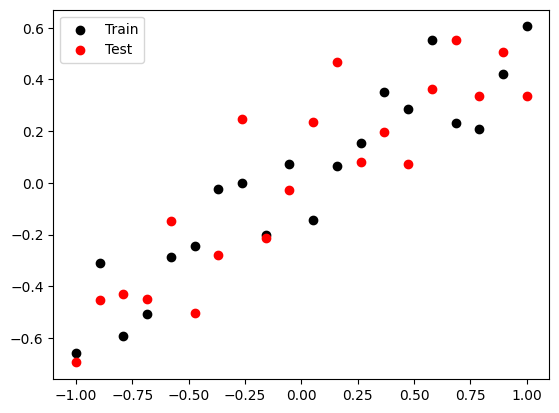

In [6]:
plt.scatter(X_train, y_train, c='black', label='Train')
plt.scatter(X_test, y_test, c='red', label='Test')
plt.legend()
plt.show()

## Regression Model

In [7]:
model = Sequential()

model.add(Dense(128, input_dim=1, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(1, activation='linear'))

C:\Users\write\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [8]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 128)                 │             256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 16,897 (66.00 KB)

 Trainable params: 16,897 (66.00 KB)

 Non-trainable params: 0 (0.00 B)

In [9]:
adam = Adam(learning_rate=0.01)
model.compile(loss='mse', optimizer=adam, metrics=['mse'])

In [10]:
history = model.fit(X_train, y_train, epochs=500, validation_data=(X_test, y_test), verbose=1)

Epoch 1/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 0.1262 - mse: 0.1262 - val_loss: 0.0353 - val_mse: 0.0353
Epoch 2/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step - loss: 0.0234 - mse: 0.0234 - val_loss: 0.0423 - val_mse: 0.0423
Epoch 3/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step - loss: 0.0293 - mse: 0.0293 - val_loss: 0.0407 - val_mse: 0.0407
Epoch 4/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 255ms/step - loss: 0.0273 - mse: 0.0273 - val_loss: 0.0322 - val_mse: 0.0322
Epoch 5/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 233ms/step - loss: 0.0191 - mse: 0.0191 - val_loss: 0.0342 - val_mse: 0.0342
Epoch 6/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 215ms/step - loss: 0.0214 - mse: 0.0214 - val_loss: 0.0368 - val_mse: 0.0368
Epoch 7/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step - loss: 0.0240 - mse: 0.0240 - val_loss: 0.0326 - val_mse: 0.0326
Epoch 8/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step - loss: 0.0195 - mse: 0.0195 - val_loss: 0.0305 - val_mse: 0.0305
Epoch 9/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step - loss: 0.0174 -

In [11]:
# evaluate the model
_, train_mse = model.evaluate(X_train, y_train, verbose=1)
_, test_mse = model.evaluate(X_test, y_test, verbose=1)
print(f"Train: {train_mse}, Test: {test_mse}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 0.0049 - mse: 0.0049
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 0.0453 - mse: 0.0453
Train: 0.004894921090453863, Test: 0.045251987874507904


In [12]:
y_pred = model.predict(X_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


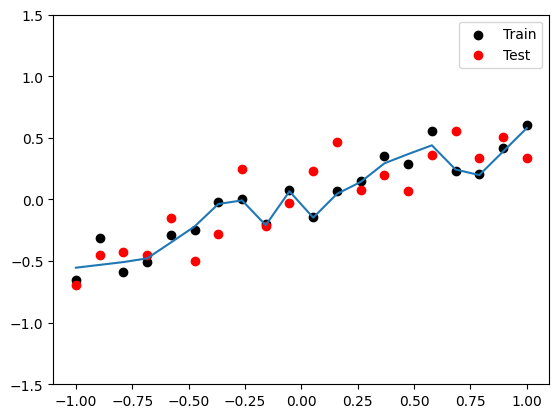

In [13]:
# plt.figure()
plt.scatter(X_train, y_train, c='black', label='Train')
plt.scatter(X_test, y_test, c='red', label='Test')
plt.plot(X_test, y_pred)
plt.ylim((-1.5, 1.5))
plt.legend()
plt.show()

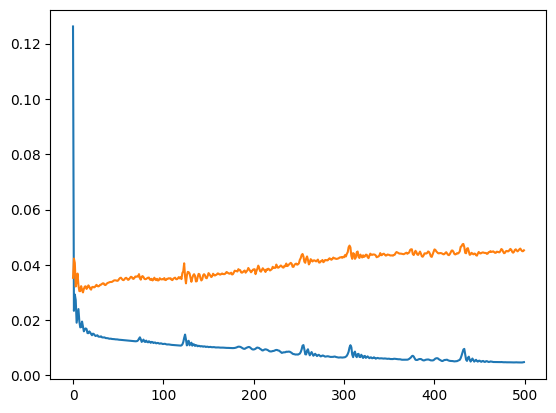

In [14]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

In [15]:
model = Sequential()

model.add(Dense(128, input_dim=1, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(1, activation='linear'))

adam = Adam(learning_rate=0.01)

model.compile(loss='mse', optimizer=adam, metrics=['mse'])

history = model.fit(X_train, y_train, epochs=500, validation_data=(X_train, y_test), verbose=2)

Epoch 1/500
1/1 - 1s - 1s/step - loss: 0.1453 - mse: 0.1453 - val_loss: 0.0334 - val_mse: 0.0334
Epoch 2/500
1/1 - 0s - 109ms/step - loss: 0.0215 - mse: 0.0215 - val_loss: 0.0769 - val_mse: 0.0769
Epoch 3/500
1/1 - 0s - 109ms/step - loss: 0.0683 - mse: 0.0683 - val_loss: 0.0422 - val_mse: 0.0422
Epoch 4/500
1/1 - 0s - 116ms/step - loss: 0.0405 - mse: 0.0405 - val_loss: 0.0324 - val_mse: 0.0324
Epoch 5/500
1/1 - 0s - 115ms/step - loss: 0.0260 - mse: 0.0260 - val_loss: 0.0412 - val_mse: 0.0412
Epoch 6/500
1/1 - 0s - 139ms/step - loss: 0.0350 - mse: 0.0350 - val_loss: 0.0452 - val_mse: 0.0452
Epoch 7/500
1/1 - 0s - 123ms/step - loss: 0.0273 - mse: 0.0273 - val_loss: 0.0427 - val_mse: 0.0427
Epoch 8/500
1/1 - 0s - 116ms/step - loss: 0.0345 - mse: 0.0345 - val_loss: 0.0363 - val_mse: 0.0363
Epoch 9/500
1/1 - 0s - 108ms/step - loss: 0.0256 - mse: 0.0256 - val_loss: 0.0304 - val_mse: 0.0304
Epoch 10/500
1/1 - 0s - 127ms/step - loss: 0.0183 - mse: 0.0183 - val_loss: 0.0285 - val_mse: 0.0285
Ep

In [16]:
# evaluate the model
_, train_mse = model.evaluate(X_train, y_train, verbose=1)
_, test_mse = model.evaluate(X_test, y_test, verbose=1)
print(f"Train: {train_mse}, Test: {test_mse}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step - loss: 0.0129 - mse: 0.0129
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step - loss: 0.0390 - mse: 0.0390
Train: 0.012872953899204731, Test: 0.03901267051696777


In [17]:
y_pred = model.predict(X_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step


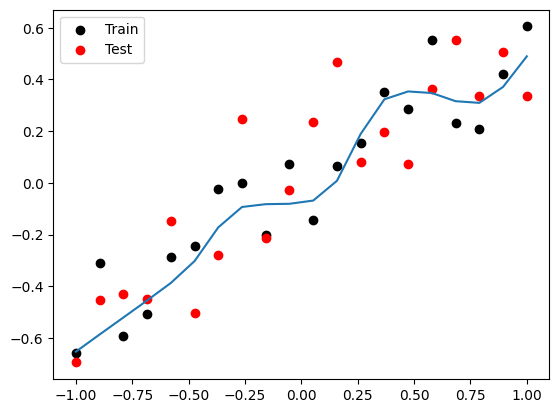

In [18]:
plt.figure()
plt.scatter(X_train, y_train, c='black', label='Train')
plt.scatter(X_test, y_test, c='red', label='Test')

plt.plot(X_train, y_pred)
plt.legend()
plt.show()

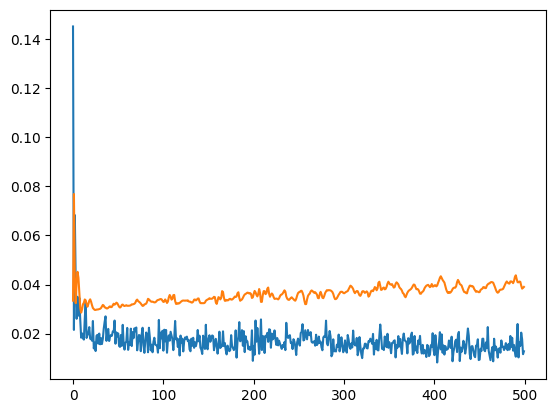

In [19]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

# Classification Model

In [20]:
import numpy as np

In [21]:
X = np.array([[-1.58986e-01,  4.23977e-01],
       [-3.47926e-01,  4.70760e-01],
       [-5.04608e-01,  3.53801e-01],
       [-5.96774e-01,  1.14035e-01],
       [-5.18433e-01, -1.72515e-01],
       [-2.92627e-01, -2.07602e-01],
       [-1.58986e-01, -4.38596e-02],
       [-5.76037e-02,  1.43275e-01],
       [-7.14286e-02,  2.71930e-01],
       [-2.97235e-01,  3.47953e-01],
       [-4.17051e-01,  2.01754e-01],
       [-4.40092e-01,  8.77193e-03],
       [-3.24885e-01, -3.21637e-02],
       [-2.46544e-01,  5.55556e-02],
       [-2.18894e-01,  2.01754e-01],
       [-3.43318e-01,  1.60819e-01],
       [-5.09217e-01,  7.89474e-02],
       [-3.84793e-01, -9.06433e-02],
       [-1.49770e-01,  1.25731e-01],
       [-1.95853e-01,  3.24561e-01],
       [-3.91705e-02, -2.19298e-01],
       [-1.08295e-01, -3.01170e-01],
       [-1.86636e-01, -3.30409e-01],
       [-2.18894e-01, -4.23977e-01],
       [-8.06452e-02, -5.64327e-01],
       [ 6.68203e-02, -5.17544e-01],
       [ 9.44700e-02, -3.24561e-01],
       [ 1.86636e-01, -1.66667e-01],
       [ 6.22120e-02, -7.30994e-02],
       [ 2.07373e-02, -1.95906e-01],
       [ 2.99539e-02, -3.42105e-01],
       [-9.90783e-02, -3.77193e-01],
       [-6.91244e-03, -4.64912e-01],
       [ 1.31336e-01, -4.29825e-01],
       [ 2.32719e-01, -1.95906e-01],
       [ 8.52535e-02, -8.47953e-02],
       [-1.31336e-01, -2.36842e-01],
       [ 2.30415e-03, -1.25731e-01],
       [ 1.22120e-01, -2.92398e-03],
       [-3.47926e-01, -3.12865e-01],
       [-2.28111e-01, -1.25731e-01],
       [-7.60369e-02,  1.46199e-02],
       [ 4.37788e-02,  2.04678e-02],
       [ 1.15207e-02,  1.54971e-01],
       [-4.17051e-01, -1.60819e-01],
       [-3.15668e-01, -3.18713e-01],
       [ 1.26728e-01, -2.19298e-01],
       [ 2.05069e-01, -3.12865e-01],
       [ 2.18894e-01, -4.59064e-01],
       [ 7.14286e-02, -6.46199e-01],
       [-1.31336e-01, -6.05263e-01],
       [-2.09677e-01, -5.81871e-01],
       [-2.28111e-01, -4.29825e-01],
       [-1.45161e-01, -4.12281e-01],
       [-6.68203e-02, -4.82456e-01],
       [ 1.35945e-01, -5.11696e-01],
       [ 2.69585e-01, -4.06433e-01],
       [ 2.97235e-01, -2.95322e-01],
       [ 2.74194e-01, -1.72515e-01],
       [ 2.55760e-01, -4.97076e-02],
       [ 2.23502e-01, -4.97076e-02],
       [ 1.82028e-01, -8.47953e-02],
       [ 1.58986e-01, -1.54971e-01],
       [ 7.14286e-02, -2.13450e-01],
       [ 1.61290e-02, -2.66082e-01],
       [-2.53456e-02, -3.83041e-01],
       [-1.15207e-02, -4.82456e-01],
       [-2.30415e-03, -5.05848e-01],
       [ 2.53456e-02, -5.11696e-01],
       [ 2.53456e-02, -5.58480e-01],
       [ 1.15207e-02, -6.57895e-01],
       [-4.83871e-02, -6.46199e-01],
       [-8.52535e-02, -5.52632e-01],
       [-9.90783e-02, -5.00000e-01],
       [-1.61290e-02, -4.23977e-01],
       [ 1.31336e-01, -3.59649e-01],
       [ 2.23502e-01, -3.71345e-01],
       [ 2.92627e-01, -3.01170e-01],
       [ 2.60369e-01, -2.07602e-01],
       [ 2.00461e-01, -2.25146e-01],
       [ 1.72811e-01, -2.71930e-01],
       [-1.31336e-01,  9.06433e-02],
       [-1.49770e-01,  7.30994e-02],
       [-2.41935e-01,  6.14035e-02],
       [-3.01843e-01,  1.78363e-01],
       [-2.97235e-01,  1.95906e-01],
       [-2.74194e-01,  3.07018e-01],
       [-3.24885e-01,  2.95322e-01],
       [-3.98618e-01,  2.66082e-01],
       [-4.35484e-01,  1.60819e-01],
       [-4.72350e-01,  7.89474e-02],
       [-3.38710e-01,  4.38596e-02],
       [-2.69585e-01,  4.38596e-02],
       [-2.55760e-01,  1.02339e-01],
       [-1.68203e-01,  2.66082e-01],
       [-1.12903e-01,  3.01170e-01],
       [-3.91705e-02,  3.47953e-01],
       [-1.26728e-01,  4.41520e-01],
       [-2.32719e-01,  4.41520e-01],
       [-3.38710e-01,  4.18129e-01],
       [-4.12442e-01,  3.53801e-01],
       [-5.09217e-01,  2.19298e-01],
       [-5.41475e-01,  1.46199e-02],
       [-5.04608e-01, -1.25731e-01],
       [-4.90783e-01, -1.43275e-01],
       [-3.61751e-01, -1.37427e-01],
       [-2.69585e-01, -8.47953e-02],
       [-2.23502e-01, -7.89474e-02],
       [-1.86636e-01, -3.80117e-02],
       [-1.54378e-01, -8.77193e-03],
       [-1.12903e-01,  5.55556e-02],
       [-8.52535e-02,  1.37427e-01],
       [-8.52535e-02,  2.77778e-01],
       [-1.68203e-01,  3.01170e-01],
       [-1.91244e-01,  1.95906e-01],
       [-1.40553e-01, -4.97076e-02],
       [-2.99539e-02,  6.72515e-02],
       [-2.00461e-01, -2.30994e-01],
       [-1.08295e-01, -8.47953e-02],
       [ 3.45622e-02,  6.72515e-02],
       [ 8.06452e-02,  1.19883e-01],
       [-3.85369e-01,  3.30409e-02],
       [-3.81221e-01,  1.31287e-01],
       [-3.52189e-01,  2.58187e-01],
       [-3.54263e-01,  3.64620e-01],
       [-4.14401e-01, -6.92982e-02],
       [-4.99424e-01, -3.24561e-02],
       [-2.98272e-01, -9.79532e-02],
       [-3.16935e-01, -1.83918e-01],
       [-3.68779e-01, -2.90351e-01],
       [-3.56336e-01, -3.96784e-01],
       [-2.71313e-01,  4.38596e-03],
       [-1.77995e-01,  8.62573e-02],
       [-2.46429e-01,  1.43567e-01],
       [-2.50576e-01,  2.29532e-01],
       [-2.21544e-01,  3.76901e-01],
       [-2.15323e-01,  2.95029e-01],
       [-1.30300e-01,  2.17251e-01],
       [-2.07028e-01,  2.89474e-02],
       [-9.71198e-02,  2.13158e-01],
       [-3.90553e-02,  2.58187e-01],
       [ 1.90092e-02,  4.01462e-01],
       [-3.69816e-02,  4.21930e-01],
       [-6.39401e-02,  3.31871e-01],
       [-1.30300e-01,  3.76901e-01],
       [-3.75000e-01, -4.37719e-01],
       [-3.95737e-01, -3.51754e-01],
       [-3.54263e-01, -2.08480e-01],
       [-4.37212e-01, -3.76316e-01],
       [-4.80760e-01, -5.03216e-01],
       [-4.10253e-01, -4.66374e-01],
       [-2.48502e-01, -2.57602e-01],
       [-2.27765e-01, -3.14912e-01],
       [-2.83756e-01, -3.84503e-01],
       [-2.92051e-01, -4.54094e-01],
       [-3.37673e-01, -5.19591e-01],
       [-2.77535e-01, -5.48246e-01],
       [-2.07028e-01, -5.35965e-01],
       [-1.86290e-01, -4.78655e-01],
       [-1.32373e-01, -5.07310e-01],
       [-1.77995e-01, -2.98538e-01],
       [-1.65553e-01, -1.75731e-01],
       [-1.61406e-01, -1.26608e-01],
       [ 3.45622e-04,  2.58187e-01],
       [ 7.91475e-02,  3.56433e-01],
       [-2.66129e-02,  1.80409e-01],
       [-5.35714e-02,  7.80702e-02],
       [-1.41705e-02, -5.29240e-02],
       [-7.01613e-02, -1.63450e-01],
       [-6.39401e-02, -2.94444e-01],
       [-3.07604e-02, -4.66374e-01],
       [-5.77189e-02, -5.27778e-01],
       [-5.35714e-02, -3.96784e-01],
       [ 5.21889e-02, -4.17251e-01],
       [-1.62442e-02, -1.67544e-01],
       [-6.39401e-02, -8.56725e-02],
       [-6.18664e-02, -1.60819e-02],
       [-3.80184e-03,  4.38596e-03],
       [ 4.18203e-02,  2.04971e-01],
       [ 7.91475e-02,  1.92690e-01],
       [ 4.59677e-02,  2.54094e-01],
       [ 1.18548e-01,  1.92690e-01],
       [ 1.10253e-01,  8.62573e-02],
       [ 1.08180e-01, -6.92982e-02],
       [ 1.66244e-01, -2.42690e-02],
       [ 1.41359e-01,  6.57895e-02],
       [ 1.43433e-01,  1.68129e-01],
       [ 1.70392e-01,  1.92690e-01],
       [ 1.08180e-01,  2.99123e-01],
       [ 1.18548e-01,  3.19591e-01],
       [ 1.26843e-01,  3.93275e-01],
       [-8.67512e-02,  4.21930e-01],
       [-4.73502e-02,  5.07895e-01],
       [ 2.52304e-02,  5.20175e-01],
       [ 6.25576e-02,  5.52924e-01],
       [-5.87558e-03,  4.42398e-01],
       [-5.14977e-02,  5.73392e-01],
       [-8.05300e-02,  5.07895e-01],
       [-1.53111e-01,  5.52924e-01],
       [-1.11636e-01,  5.48830e-01],
       [-1.63479e-01,  4.91520e-01],
       [-2.52650e-01, -1.88012e-01],
       [-2.46429e-01, -3.65497e-02],
       [-3.21083e-01, -4.33626e-01],
       [-3.31452e-01, -6.05556e-01],
       [-3.85369e-01, -5.15497e-01],
       [-3.99885e-01, -6.21930e-01],
       [-1.24078e-01, -1.26608e-01],
       [-3.16935e-01, -2.28947e-01],
       [-2.94124e-01, -1.34795e-01],
       [-1.53111e-01,  1.84503e-01]])

In [22]:
y = np.array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0.,
       0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       0., 1., 1., 1., 1., 0., 0.])

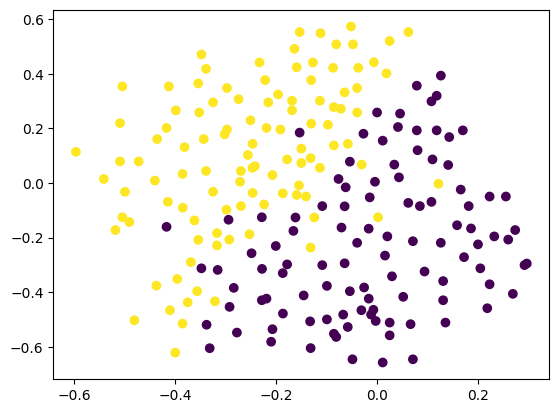

In [23]:
import matplotlib.pyplot as plt

plt.scatter(X[:,0], X[:,1], c=y)
plt.show()

In [32]:
model = Sequential()

model.add(Dense(128, input_dim=2, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

adam = Adam(learning_rate=0.01)
model.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])

history = model.fit(X, y, epochs=500, validation_split=0.2, verbose=1)

Epoch 1/500
6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 62ms/step - accuracy: 0.7744 - loss: 0.5863 - val_accuracy: 0.5814 - val_loss: 0.7099
Epoch 2/500
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.8635 - loss: 0.2799 - val_accuracy: 0.7674 - val_loss: 0.5267
Epoch 3/500
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.8763 - loss: 0.2916 - val_accuracy: 0.8372 - val_loss: 0.3847
Epoch 4/500
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.9303 - loss: 0.2276 - val_accuracy: 0.8372 - val_loss: 0.4103
Epoch 5/500
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.9347 - loss: 0.2197 - val_accuracy: 0.8140 - val_loss: 0.3919
Epoch 6/500
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.9139 - loss: 0.2432 - val_accuracy: 0.8605 - val_loss: 0.4135
Epoch 7/500
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.8939 - loss: 0.2613 - val_accuracy: 0.8372 - val_loss: 0.4059
Epoch 8/500
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.9268 - loss: 0.2283 - val_accuracy: 0.8605 - val_loss:

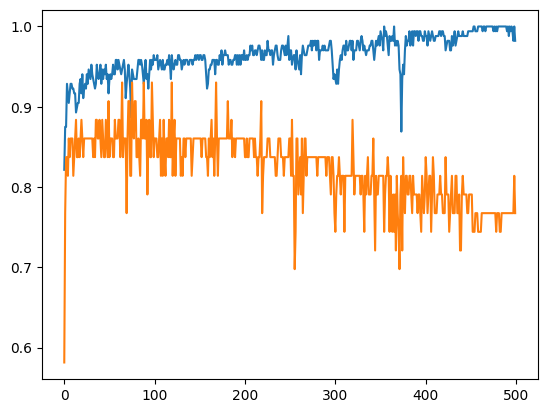

In [33]:
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Test')
plt.plot()
plt.show()

In [34]:
from mlxtend.plotting import plot_decision_regions

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 15s 2ms/step


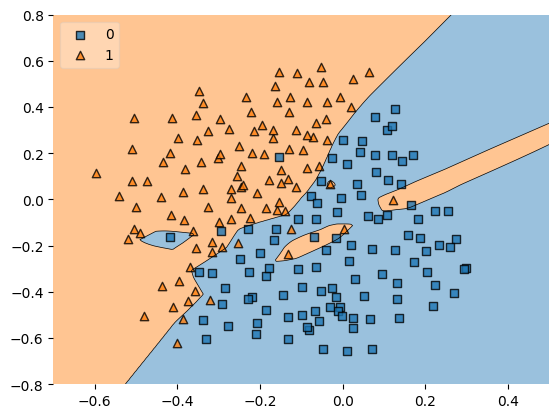

In [36]:
plot_decision_regions(X, y.astype('int'), clf = model, legend=2)
plt.xlim(-0.7, 0.5)
plt.ylim(-0.8, 0.8)
plt.show()

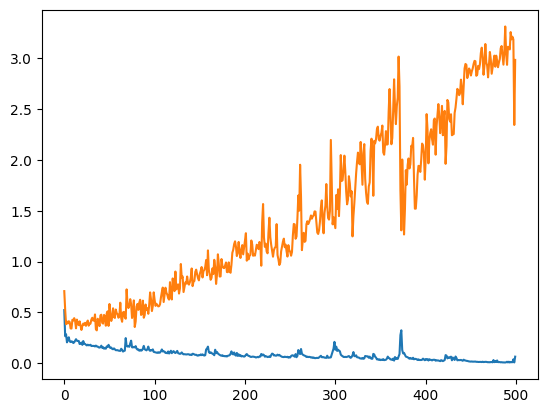

In [38]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

In [46]:
model = Sequential()

model.add(Dense(128, input_dim=2, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(1, activation='sigmoid'))

adam = Adam(learning_rate=0.01)
model.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])

history=model.fit(X, y, epochs=500, validation_split=0.2, verbose=2)

Epoch 1/500


C:\Users\write\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6/6 - 1s - 244ms/step - accuracy: 0.7083 - loss: 0.5837 - val_accuracy: 0.6047 - val_loss: 0.6068
Epoch 2/500
6/6 - 0s - 26ms/step - accuracy: 0.8988 - loss: 0.3046 - val_accuracy: 0.6977 - val_loss: 0.6142
Epoch 3/500
6/6 - 0s - 28ms/step - accuracy: 0.8690 - loss: 0.2843 - val_accuracy: 0.8140 - val_loss: 0.4622
Epoch 4/500
6/6 - 0s - 26ms/step - accuracy: 0.8810 - loss: 0.3245 - val_accuracy: 0.8140 - val_loss: 0.4642
Epoch 5/500
6/6 - 0s - 29ms/step - accuracy: 0.8869 - loss: 0.3158 - val_accuracy: 0.8140 - val_loss: 0.4465
Epoch 6/500
6/6 - 0s - 26ms/step - accuracy: 0.9048 - loss: 0.2344 - val_accuracy: 0.8605 - val_loss: 0.3363
Epoch 7/500
6/6 - 0s - 27ms/step - accuracy: 0.8869 - loss: 0.2407 - val_accuracy: 0.8372 - val_loss: 0.3742
Epoch 8/500
6/6 - 0s - 20ms/step - accuracy: 0.8869 - loss: 0.2422 - val_accuracy: 0.8372 - val_loss: 0.3694
Epoch 9/500
6/6 - 0s - 31ms/step - accuracy: 0.8929 - loss: 0.2507 - val_accuracy: 0.8605 - val_loss: 0.3856
Epoch 10/500
6/6 - 0s - 29ms/s

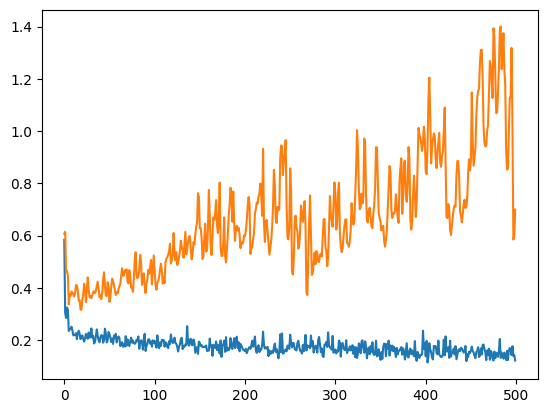

In [47]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

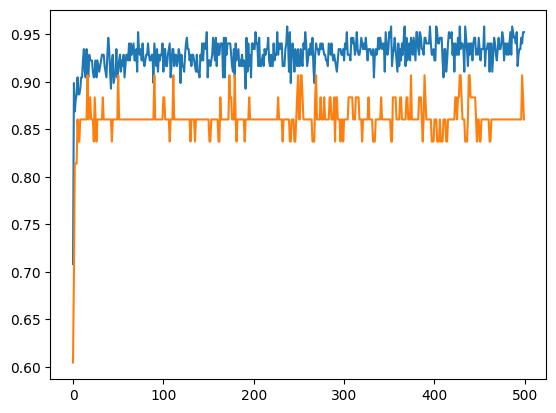

In [48]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 16s 2ms/step


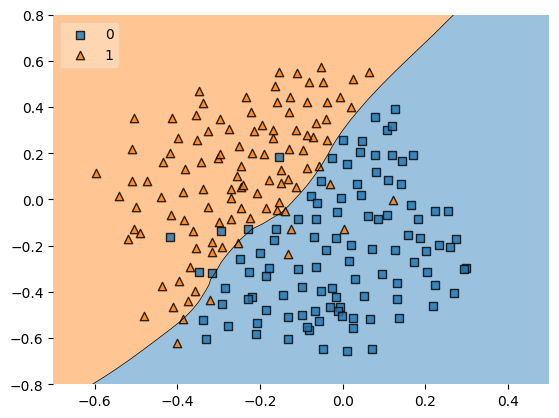

In [49]:
plot_decision_regions(X, y.astype(np.int_), clf=model, legend=2)
plt.xlim(-0.7, 0.5)
plt.ylim(-0.8, 0.8)
plt.show()